<!-- dom:TITLE: Theoretisch-Physikalisches Seminar -->
# Nichtlineare Dynamik und Strukturbildung
<!-- dom:AUTHOR: Philipp Hoevel, Saarland University -->
<!-- Author: --> **Philipp Hövel**, Saarland University

Date: **April 29, 2024**

### Tasks

  * Solution to coding part of first assignment

### Importing helpful Python modules

In [1]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import numpy as np
import pylab as pl

### Love affair
$$
\dot{R}= a R + b J \\
\dot{J}= c R + d J 
$$

In [2]:
# Love affairs
def F_LA(X, t):
    R, J = X
    return [a*R + b*J,                
            c*R + d*J]

In [3]:
a=0.
b=1.
c=-1.
d=0.
R0 = 1.
J0 = 1.

t = np.linspace(0, 1000, 20001)
erg, info = odeint(F_LA, (R0,J0), t, full_output=True)

x, y = erg.transpose()

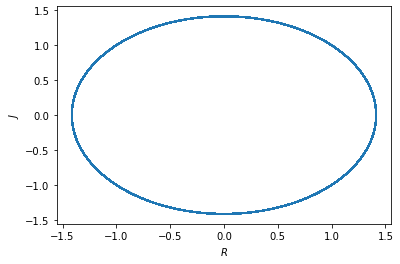

In [4]:
##Plot
pl.plot(x,y)
pl.xlabel('$R$')
pl.ylabel('$J$')
pl.show()

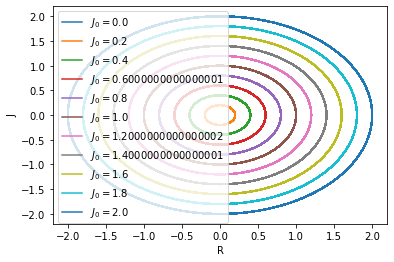

In [5]:
IC = np.linspace(0., 2., 11) # initial conditions for deer population (prey)
for S in IC:
    X0 = [0., S]
    Xs = odeint(F_LA, X0, t)
    plt.plot(Xs[:,0], Xs[:,1], "-", label = "$J_0 =$"+str(X0[1]))
pl.xlabel("R")
pl.ylabel("J")
pl.legend()
pl.show()

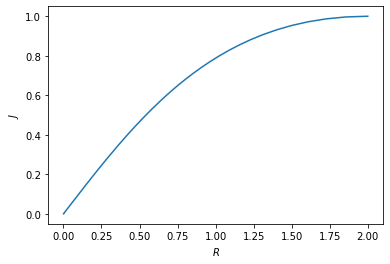

In [6]:
a=-2.
b=1.
c=1.
d=-2.
R0 = 2.
J0 = 1.

t = np.linspace(0, 1000, 20001)
erg, info = odeint(F_LA, (R0,J0), t, full_output=True)

x, y = erg.transpose()
##Plot
pl.plot(x,y)
pl.xlabel('$R$')
pl.ylabel('$J$')
pl.show()

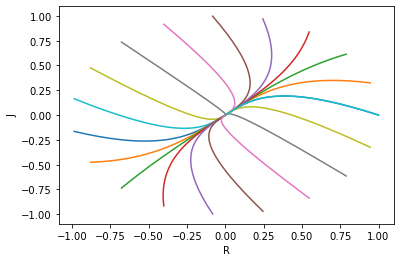

In [7]:
IC = np.linspace(0., 2*np.pi, 20) # initial conditions for deer population (prey)
for S in IC:
    X0 = [np.cos(S), np.sin(S)]
    Xs = odeint(F_LA, X0, t)
    plt.plot(Xs[:,0], Xs[:,1], "-", label = "$J_0 =$"+str(X0[0]))
pl.xlabel("R")
pl.ylabel("J")
#pl.legend()
pl.show()

#### Maxwell-Bloch-Gleichungen
$$
\dot{E} = \kappa (P-E)\\
\dot{D} = \gamma_1 (ED-P)\\
\dot{P} = \gamma_2 (\lambda + 1 - D - EP)\\
$$

In [8]:
# Maxwell-Bloch system
def F_MB(X, t):
    E, P, D = X
    return [kappa*(P-E),                
            gamma1*(E*D-P),                
            gamma2*(lam+1 - D - E*P)]

In [9]:
#Parameters
kappa=0.01
gamma1=0.1
gamma2=1.0
lam= 1.
#lam= 2.
#lam= -1.

#Initial conditions
E0 = 1.
D0 = 2.
P0 = 3.
X0 = [E0, D0, P0]

#Set the integration time
t = np.linspace(0, 1000, 20001)

#Integrate
erg, info = odeint(F_MB, X0, t, full_output=True)

#Split solution erg into variables
E, D, P = erg.transpose()

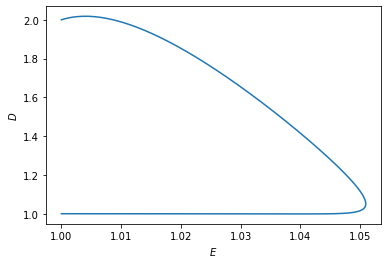

In [10]:
pl.plot(E,D)
pl.xlabel('$E$')
pl.ylabel('$D$')
pl.show()

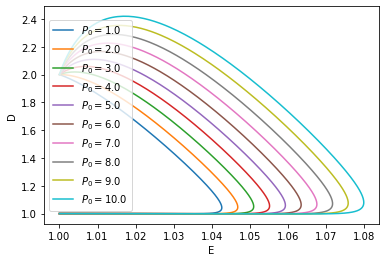

In [11]:
IC = np.linspace(1.0, 10.0, 10) # initial conditions for population inversion
for S in IC:
    X0 = [1., 2., S]
    Xs = odeint(F_MB, X0, t)
    plt.plot(Xs[:,0], Xs[:,1], "-", label = "$P_0 =$"+str(X0[2]))
pl.xlabel("E")
pl.ylabel("D")
pl.legend()
pl.show()

#### Reduced equation
$$\dot{E} = \kappa E\frac{\lambda-E^2}{E^2+1}$$

In [12]:
# reduced Maxwell-Bloch system 
def F_MB_red(X, t):
    E = X
    return kappa*E*((lam-E*E)/(E*E+1))

In [13]:
#Anfangsbedingungen
E0=1
kappa=0.01

#Bifurkationsparameter
A = np.linspace(-4,4, 30)
dt = .01 #Zeitschritt

tmax=15000
t = np.linspace(0, tmax, int(tmax/dt),endpoint=False)
maximum1=[]
minimum1=[]
maximum2=[]
minimum2=[]
for lam in A:
    erg1, info1 = odeint(F_MB_red, E0, t, full_output=True) #Integration der DGL
    x = erg1
    maximum1.append(np.max(x[int(10000/dt):])) #Maximum suchen, ersten 100 Zeiteinheiten als Transiente betrachten 
    minimum1.append(np.min(x[int(10000/dt):])) #Minimum suchen, ersten 100 Zeiteinheiten als Transiente betrachten 
    erg2, info2 = odeint(F_MB_red, -E0, t, full_output=True) #Integration der DGL mit negativem E0
    x = erg2
    maximum2.append(np.max(x[int(10000/dt):])) #Maximum suchen, ersten 100 Zeiteinheiten als Transiente betrachten 
    minimum2.append(np.min(x[int(10000/dt):])) #Minimum suchen, ersten 100 Zeiteinheiten als Transiente betrachten 

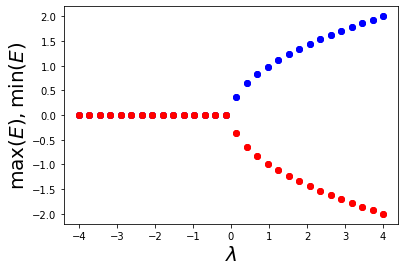

In [14]:
#Plot
pl.plot(A,maximum1, "o", color="blue")
pl.plot(A,minimum1, "o", color="blue")
pl.plot(A,maximum2, "o", color="red")
pl.plot(A,minimum2, "o", color="red")
pl.xlabel('$\lambda$',size=20)
pl.ylabel('$\max(E),\min(E)$',size=20)
pl.show()

Calculating the unstable branch

In [15]:
#Anfangsbedingungen
#E0=1
kappa=0.01

#Bifurkationsparameter
A2 = np.linspace(0,4, 10)
dt = .01 #Zeitschritt

tmax=15000
t = np.linspace(0, -tmax, int(tmax/dt),endpoint=False) #integrating backwards in time!!!
maximum3=[]
minimum3=[]
for lam in A2:
    erg3, info3 = odeint(F_MB_red, np.sqrt(lam)/2, t, full_output=True) #Integration der DGL
    x = erg3
    maximum3.append(np.max(x[int(10000/dt):])) #Maximum suchen, ersten 100 Zeiteinheiten als Transiente betrachten 
    minimum3.append(np.min(x[int(10000/dt):])) #Minimum suchen, ersten 100 Zeiteinheiten als Transiente betrachten 

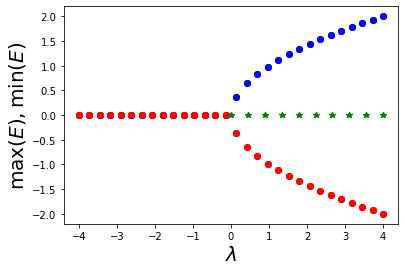

In [16]:
#Plot
pl.plot(A,maximum1, "o", color="blue")
pl.plot(A,minimum1, "o", color="blue")
pl.plot(A,maximum2, "o", color="red")
pl.plot(A,minimum2, "o", color="red")
pl.plot(A2,minimum3, "*", color="green")
pl.plot(A2,minimum3, "*", color="green")
pl.xlabel('$\lambda$',size=20)
pl.ylabel('$\max(E),\min(E)$',size=20)
pl.show()